# Synthetic experiments

In [1]:
import project_path
from util.syn_exps import grid_search
import numpy as np
import matplotlib.pyplot as plt
from omegaconf import OmegaConf


In [2]:
params = OmegaConf.load('../configs/synthetic_conf.yaml')
params.model.geoTL.theta


[0.01, 1000]

In [3]:
(
    err_orig,
    err_geoTL,
    err_horpca,
    err_hosvd,
    err_gmlsvd,
    err_nnfold
 ) = grid_search(params.noise.SNR, params.data, params.model)

In [4]:
from scipy.io import savemat

mdict = {'Original': err_orig, 'geoTL': err_geoTL, 'HoRPCA':err_horpca, 'HoSVD':err_hosvd}
savemat('outputs.mat', mdict)

In [5]:
err_geoTL.shape

(1, 1, 6, 1, 1)

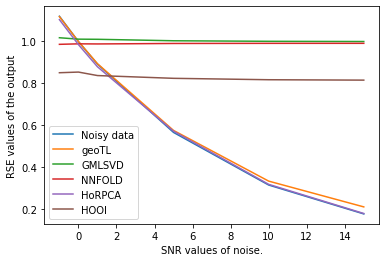

In [5]:
plt.plot(params.noise.SNR, err_orig[0,0,:].squeeze(), label='Noisy data')
plt.plot(params.noise.SNR, err_geoTL[0,0,:,0,1].squeeze(), label='geoTL')
plt.plot(params.noise.SNR, err_gmlsvd[0,0,:].squeeze(), label='GMLSVD')
plt.plot(params.noise.SNR, err_nnfold[0,0,:].squeeze(), label='NNFOLD')
plt.plot(params.noise.SNR, err_horpca[0,0,:].squeeze(), label='HoRPCA')
plt.plot(params.noise.SNR, err_hosvd[0,0,:].squeeze(), label='HOOI')
plt.xlabel('SNR values of noise.')
plt.ylabel('RSE values of the output')
plt.legend()
plt.show()